# Predicting Breast Cancer Survival with Deep Learning and Machine Learning

**------------------Classical Regression Section----------------**

**COMS 4671 Computational Biology Final Project**


**Group Memebers:**

- Dongbing Han, dh3071
- Shanshan Gong - sg3445
- Chengyu Wang - cw3512

**Dataset:**

The Molecular Taxonomy of Breast Cancer International Consortium (METABRIC) database is a Canada-UK Project which contains targeted sequencing data of 1,980 primary breast cancer samples. Clinical and genomic data was downloaded from cBioPortal.

The dataset was collected by Professor Carlos Caldas from Cambridge Research Institute and Professor Sam Aparicio from the British Columbia Cancer Centre in Canada and published on Nature Communications (Pereira et al., 2016).

**Dataset Links:**
https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric/data

**Outlines:**

- Part 0: Data Loading and Preview
- Part 1: Data Processing & Cleaning
- Part 2: Visualization of Relationship Between Clinical Attributes and Outcomes
- Part 3: Visualization of Relationship Between Genetic Attributes and Outcomes
- Part 4: Clinical Features Predcition
- Part 5: Clinical & Genetic Features Predcition
- Part 6: Genetic Feature Prediction

**Starting the Final Project**

In [1]:
from prettytable import PrettyTable

# Create table
table = PrettyTable()
table.field_names = ["Model", "Accuracy (%)"]

# Add data
table.add_row(["LinearRegression", "10.31%"])
table.add_row(["DecisionTreeRegressor", "17.11%"])
table.add_row(["RandomForestRegressor", "14.12%"])
table.add_row(["SVR", "12.14%"])
table.add_row(["GradientBoostingRegressor", "9.54%"])

# Print table
print(table)

+---------------------------+--------------+
|           Model           | Accuracy (%) |
+---------------------------+--------------+
|      LinearRegression     |    10.31%    |
|   DecisionTreeRegressor   |    17.11%    |
|   RandomForestRegressor   |    14.12%    |
|            SVR            |    12.14%    |
| GradientBoostingRegressor |    9.54%     |
+---------------------------+--------------+


In [ ]:
'Please do not forget to create a shortcut for the "COMS4761_Bioinformatics_Project" folder in your Google Drive "MyDrive" section. You could find the folder in Shared With Me'

'Please do not forget to create a shortcut for the "COMS4761_Bioinformatics_Project" folder in your Google Drive "MyDrive" section. You could find the folder in Shared With Me'

In [ ]:
'Skip the data visualization part and proceed directly to part 4 for machine learning processing.'

'Skip the data visualization part and proceed directly to part 4 for machine learning processing.'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'Import '

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import xgboost as xgb

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.compose import make_column_transformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_graphviz


from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, f1_score,\
recall_score, accuracy_score, precision_score, confusion_matrix, mean_squared_error,r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import brier_score_loss

from sklearn.calibration import CalibratedClassifierCV, calibration_curve, CalibrationDisplay

import warnings
warnings.filterwarnings("ignore")

In [ ]:
%cd /content/drive/MyDrive/COMS_4761_Bioinformatics_Project
!ls

/content/drive/MyDrive/COMS_4761_Bioinformatics_Project
 Backup_ipynb
'COMS_4761_Bioinformatics_Clinic&Genetic_Complex.ipynb'
 COMS_4761_Bioinformatics_Initial_Version_Classic_Regression.ipynb
 data
'Final Project Edit 1.ipynb'
'Final Project Edit 2.ipynb'
 k-fold-deep-hit-single-survival-best.ipynb
'Presentations and Reports'


# Part 0: Data Loading and Preview

In [ ]:
# Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/COMS_4761_Bioinformatics_Project/data/METABRIC_RNA_Mutation.csv')
df

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0              0             75.65             MASTECTOMY  Breast Cancer   
1              2             43.19      BREAST CONSERVING  Breast Cancer   
2              5             48.87             MASTECTOMY  Breast Cancer   
3              6             47.68             MASTECTOMY  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1899        7295             43.10      BREAST CONSERVING  Breast Cancer   
1900        7296             42.88             MASTECTOMY  Breast Cancer   
1901        7297             62.90             MASTECTOMY  Breast Cancer   
1902        7298             61.16             MASTECTOMY  Breast Cancer   
1903        7299             60.02      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity  chemotherapy  \
0              Breast Invasive Ductal Carcinoma         NaN             0   
1              Breast Invasive Ductal Carcinoma        High             0   
2              Breast Invasive Ductal Carcinoma        High             1   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4     Breast Mixed Ductal and Lobular Carcinoma        High             1   
...                                         ...         ...           ...   
1899          Breast Invasive Lobular Carcinoma        High             0   
1900           Breast Invasive Ductal Carcinoma        High             0   
1901           Breast Invasive Ductal Carcinoma        High             0   
1902           Breast Invasive Ductal Carcinoma    Moderate             0   
1903           Breast Invasive Ductal Carcinoma        High             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                    claudin-low     1.0                   Positve  ...   
1                           LumA     1.0                   Positve  ...   
2                           LumB     1.0                   Positve  ...   
3                           LumB     1.0                   Positve  ...   
4                           LumB     1.0                   Positve  ...   
...                          ...     ...                       ...  ...   
1899                        LumA     4.0                   Positve  ...   
1900                        LumB     4.0                   Positve  ...   
1901                        LumB     4.0                   Positve  ...   
1902                        LumB     4.0                   Positve  ...   
1903                        LumB     4.0                   Positve  ...   

     mtap_mut  ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut  \
0           0           0           0        0          0         0         0   
1           0           0           0        0          0         0         0   
2           0           0           0        0          0         0         0   
3           0           0           0        0          0         0         0   
4           0           0           0        0          0         0         0   
...       ...         ...         ...      ...        ...       ...       ...   
1899        0           0           0        0          0         0         0   
1900        0           0           0        0          0         0         0   
1901        0           0           0        0          0         0         0   
1902        0           0           0        0          0         0         0   
1903        0           0           0        0          0         0         0   

     smarcb1_mut stmn2_mut  siah1_mut  
0              0         0          0  
1              0         0          0  
2              0         0          0  
3              0         0          0  
4              0         0          0  
...          ...       ...        ...  
1899          

In [ ]:
# Display basic summary statistics of numeric columns
nRow, nCol = df.shape
print(f'There are {nRow} rows (samples) and {nCol} columns (variables)')

# Display basic summary statistics of numeric columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check data types of columns
print("\nData Types:")
print(df.dtypes)

# Display the column names
print("\nColumn Names:")
print(df.columns)

There are 1904 rows (samples) and 693 columns (variables)

Summary Statistics:
        patient_id  age_at_diagnosis  chemotherapy       cohort  \
count  1904.000000       1904.000000   1904.000000  1904.000000   
mean   3921.982143         61.087054      0.207983     2.643908   
std    2358.478332         12.978711      0.405971     1.228615   
min       0.000000         21.930000      0.000000     1.000000   
25%     896.500000         51.375000      0.000000     1.000000   
50%    4730.500000         61.770000      0.000000     3.000000   
75%    5536.250000         70.592500      0.000000     3.000000   
max    7299.000000         96.290000      1.000000     5.000000   

       neoplasm_histologic_grade  hormone_therapy  \
count                1832.000000      1904.000000   
mean                    2.415939         0.616597   
std                     0.650612         0.486343   
min                     1.000000         0.000000   
25%                     2.000000         0.000000   


**Clinical & Genetic & Cancer-Related Attributes of the Dataset:**

| Name                           | Type   | Description                                                                                                    |
|--------------------------------|--------|---------------------------------------------------------------------------------------------------------------|
| patient_id                     | object | Unique identifier assigned to each patient.                                                                     |
| age_at_diagnosis               | float  | The age of the patient at the time of diagnosis with breast cancer.                                            |
| type_of_breast_surgery         | object | Type of breast cancer surgery: 1- MASTECTOMY, which refers to a surgery to remove all breast tissue from a breast as a way to treat or prevent breast cancer. 2- BREAST CONSERVING, which refers to a surgery where only the part of the breast that has cancer is removed. |
| cancer_type                    | object | The classification of breast cancer as either Breast Cancer or Breast Sarcoma.                                  |
| cancer_type_detailed           | object | Detailed categorization of breast cancer type based on pathology findings.                                      |
| cellularity                    | object | The density and arrangement of tumor cells observed post-chemotherapy.                                          |
| chemotherapy                   | int    | Indicates whether the patient received chemotherapy as part of treatment (yes/no).                             |
| pam50_+_claudin-low_subtype    | object | Molecular characteristics indicating the likelihood of metastasis for certain types of breast cancer.          |
| cohort                         | float  | Group of patients with shared defining characteristics.                                                         |
| er_status_measured_by_ihc      | float  | Evaluation of estrogen receptor expression using immune-histochemistry (positive/negative).                     |
| er_status                      | object | Indicates the estrogen receptor status of cancer cells (positive/negative).                                     |
| neoplasm_histologic_grade      | int    | Pathological grade reflecting the aggressiveness of cancer cells.                                               |
| her2_status_measured_by_snp6   | object | Evaluation of HER2 status using advanced molecular techniques.                                                  |
| her2_status                    | object | Indicates the HER2 status of the cancer (positive/negative).                                                     |
| tumor_other_histologic_subtype | object | Subtype of breast cancer based on microscopic examination of tissue.                                             |
| hormone_therapy                | int    | Indicates whether the patient received hormonal therapy as part of treatment (yes/no).                          |
| inferred_menopausal_state      | object | Inferred menopausal status of the patient (post/pre).                                                            |
| integrative_cluster            | object | Molecular subtype of the cancer determined by gene expression patterns.                                          |
| primary_tumor_laterality       | object | Indicates the involvement side of the breast (right/left).                                                       |
| lymph_nodes_examined_positive  | float  | The number of lymph nodes examined and found positive for cancer.                                                |
| mutation_count                 | float  | Number of relevant gene mutations observed.                                                                      |
| nottingham_prognostic_index    | float  | Index used to determine breast cancer prognosis based on tumor characteristics.                                 |
| oncotree_code                  | object | Unique code used for standardizing cancer type diagnosis.                                                        |
| overall_survival_months        | float  | Duration from intervention to death (in months).                                                                 |
| overall_survival               | object | Indicates whether the patient is alive or dead (target variable).                                                |
| pr_status                      | object | Indicates the progesterone receptor status of cancer cells (positive/negative).                                  |
| radio_therapy                  | int    | Indicates whether the patient received radiotherapy as part of treatment (yes/no).                               |
| 3-gene_classifier_subtype      | object | Subtype of breast cancer classified using a three-gene classifier.                                               |
| tumor_size                     | float  | Size of the tumor measured by imaging techniques.                                                               |
| tumor_stage                    | float  | Stage of the cancer based on its spread and involvement of surrounding structures.                               |
| death_from_cancer              | int    | Indicates whether the patient's death was attributed to cancer (yes/no).                                         |
| type_of_breast_surgery         | object | Type of breast cancer surgery: 1- MASTECTOMY, which refers to a surgery to remove all breast tissue from a breast as a way to treat or prevent breast cancer. 2- BREAST CONSERVING, which refers to a surgery where only the part of the breast that has cancer is removed. |


# Part 1: Data Processing & Cleaning

In [ ]:
# Finding missing data and the percentage of it in each column
total_missing = df.isnull().sum()
percent_missing = (total_missing / len(df)) * 100
missing_data = pd.DataFrame({'Total_NaN': total_missing, 'Percent_Nan': percent_missing})
missing_data = missing_data.sort_values(by='Total_NaN', ascending=False)
missing_data.head(14)

Total_NaN  Percent_Nan
tumor_stage                           501    26.313025
3-gene_classifier_subtype             204    10.714286
primary_tumor_laterality              106     5.567227
neoplasm_histologic_grade              72     3.781513
cellularity                            54     2.836134
mutation_count                         45     2.363445
er_status_measured_by_ihc              30     1.575630
type_of_breast_surgery                 22     1.155462
tumor_size                             20     1.050420
cancer_type_detailed                   15     0.787815
oncotree_code                          15     0.787815
tumor_other_histologic_subtype         15     0.787815
death_from_cancer                       1     0.052521
ar                                      0     0.000000

In [ ]:
'''
In the dataset, the genetic information is entirely intact, with no missing data present. However, the clinical data reveals varying levels of missing information across different features. Notably, the `tumor_stage` column displays the highest degree of missingness, with approximately 26% of its data absent. Similarly, the `3-gene_classifier_subtype` column exhibits a notable proportion of missing data, accounting for approximately 10.7% of its entries. Additionally, the `primary_tumor_laterality` column shows a moderate level of missing data, with around 3.7% of its values being absent. Moreover, there are nine other clinical features where the extent of missing data ranges from approximately 3% down to as little as 0.001%. Conversely, the remaining features within the dataset are entirely complete, without any missing data.
'''

'\nIn the dataset, the genetic information is entirely intact, with no missing data present. However, the clinical data reveals varying levels of missing information across different features. Notably, the `tumor_stage` column displays the highest degree of missingness, with approximately 26% of its data absent. Similarly, the `3-gene_classifier_subtype` column exhibits a notable proportion of missing data, accounting for approximately 10.7% of its entries. Additionally, the `primary_tumor_laterality` column shows a moderate level of missing data, with around 3.7% of its values being absent. Moreover, there are nine other clinical features where the extent of missing data ranges from approximately 3% down to as little as 0.001%. Conversely, the remaining features within the dataset are entirely complete, without any missing data.\n'

# Part 2: Visualization of Relationship Between Clinical Attributes and Outcomes

In [ ]:
# Create a new dataframe containing only clinical attributes
non_clinical_features = df.columns[31:]  # Identify non-clinical attributes
clinical_df = df.drop(non_clinical_features, axis=1)  # Drop non-clinical attributes
clinical_df.head()  # Display the first few rows of the clinical dataframe

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                 claudin-low     1.0                   Positve  ...   
1                        LumA     1.0                   Positve  ...   
2                        LumB     1.0                   Positve  ...   
3                        LumB     1.0                   Positve  ...   
4                        LumB     1.0                   Positve  ...   

  nottingham_prognostic_index  oncotree_code overall_survival_months  \
0                       6.044            IDC              140.500000   
1                       4.020            IDC               84.633333   
2                       4.030            IDC              163.700000   
3                       4.050           MDLC              164.933333   
4                       6.080           MDLC               41.366667   

  overall_survival pr_status  radio_therapy 3-gene_classifier_subtype  \
0                1  Negative              1                 ER-/HER2-   
1                1  Positive              1     ER+/HER2- High Prolif   
2                0  Positive              0                       NaN   
3                1  Positive              1                       NaN   
4                0  Positive              1     ER+/HER2- High Prolif   

  tumor_size tumor_stage  death_from_cancer  
0       22.0         2.0             Living  
1       10.0         1.0             Living  
2       15.0         2.0    Died of Disease  
3       25.0         2.0             Living  
4       40.0         2.0    Died of Disease  

[5 rows x 31 columns]

In [ ]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

In [ ]:
# Selecting categorical clinical columns
cat_clinical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
# Generating statistical summary for categorical clinical attributes
categorical_summary = clinical_df[cat_clinical_columns].astype('category').describe().T
# Display the statistical summary in a table format
print("Statistical Summary for Categorical Clinical Attributes:")
print(categorical_summary)


Statistical Summary for Categorical Clinical Attributes:
                               count unique                               top  \
type_of_breast_surgery          1882      2                        MASTECTOMY   
cancer_type                     1904      2                     Breast Cancer   
cancer_type_detailed            1889      6  Breast Invasive Ductal Carcinoma   
cellularity                     1850      3                              High   
pam50_+_claudin-low_subtype     1904      7                              LumA   
er_status_measured_by_ihc       1874      2                           Positve   
er_status                       1904      2                          Positive   
her2_status_measured_by_snp6    1904      4                           NEUTRAL   
her2_status                     1904      2                          Negative   
tumor_other_histologic_subtype  1889      8                        Ductal/NST   
inferred_menopausal_state       1904      2         

In [ ]:
# Selecting numerical clinical columns
num_clinical_columns = clinical_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Generating statistical summary for numerical clinical attributes
numerical_summary = clinical_df[num_clinical_columns].describe().T
# Display the statistical summary in a table format
print("Statistical Summary for Numerical Clinical Attributes:")
print(numerical_summary)


Statistical Summary for Numerical Clinical Attributes:
                                count         mean          std    min  \
patient_id                     1904.0  3921.982143  2358.478332   0.00   
age_at_diagnosis               1904.0    61.087054    12.978711  21.93   
chemotherapy                   1904.0     0.207983     0.405971   0.00   
cohort                         1904.0     2.643908     1.228615   1.00   
neoplasm_histologic_grade      1832.0     2.415939     0.650612   1.00   
hormone_therapy                1904.0     0.616597     0.486343   0.00   
lymph_nodes_examined_positive  1904.0     2.002101     4.079993   0.00   
mutation_count                 1859.0     5.697687     4.058778   1.00   
nottingham_prognostic_index    1904.0     4.033019     1.144492   1.00   
overall_survival_months        1904.0   125.121324    76.334148   0.00   
overall_survival               1904.0     0.420693     0.493800   0.00   
radio_therapy                  1904.0     0.597164     0.

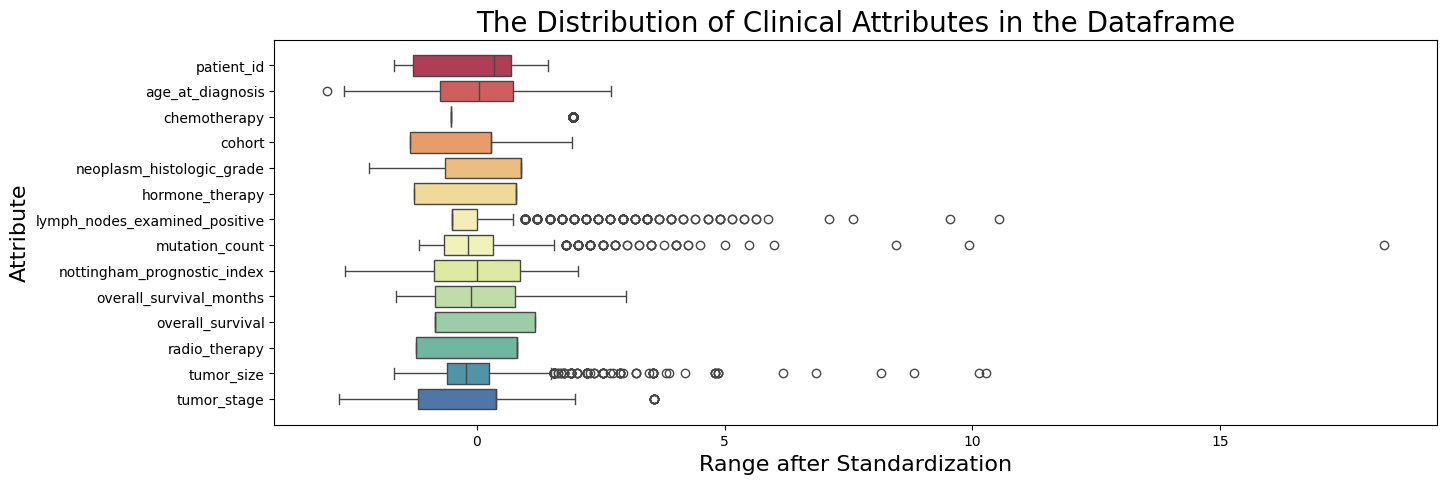

In [ ]:
# Function to transform dataframe into standard form after dropping non-numerical columns
def to_standard(df):
    num_df = df[df.select_dtypes(include=np.number).columns.tolist()]
    ss = StandardScaler()
    std = ss.fit_transform(num_df)
    std_df = pd.DataFrame(std, index=num_df.index, columns=num_df.columns)
    return std_df

# Plotting the distribution of clinical attributes after standardization
ax, fig = plt.subplots(1, 1, figsize=(15, 5))
plt.title('The Distribution of Clinical Attributes in the Dataframe', fontsize=20)

sns.boxplot(y="variable", x="value", data=pd.melt(to_standard(clinical_df)), palette='Spectral')
plt.xlabel('Range after Standardization', size=16)
plt.ylabel('Attribute', size=16)

# Fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim()  # Discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # Update the ylim(bottom, top) values

plt.show()


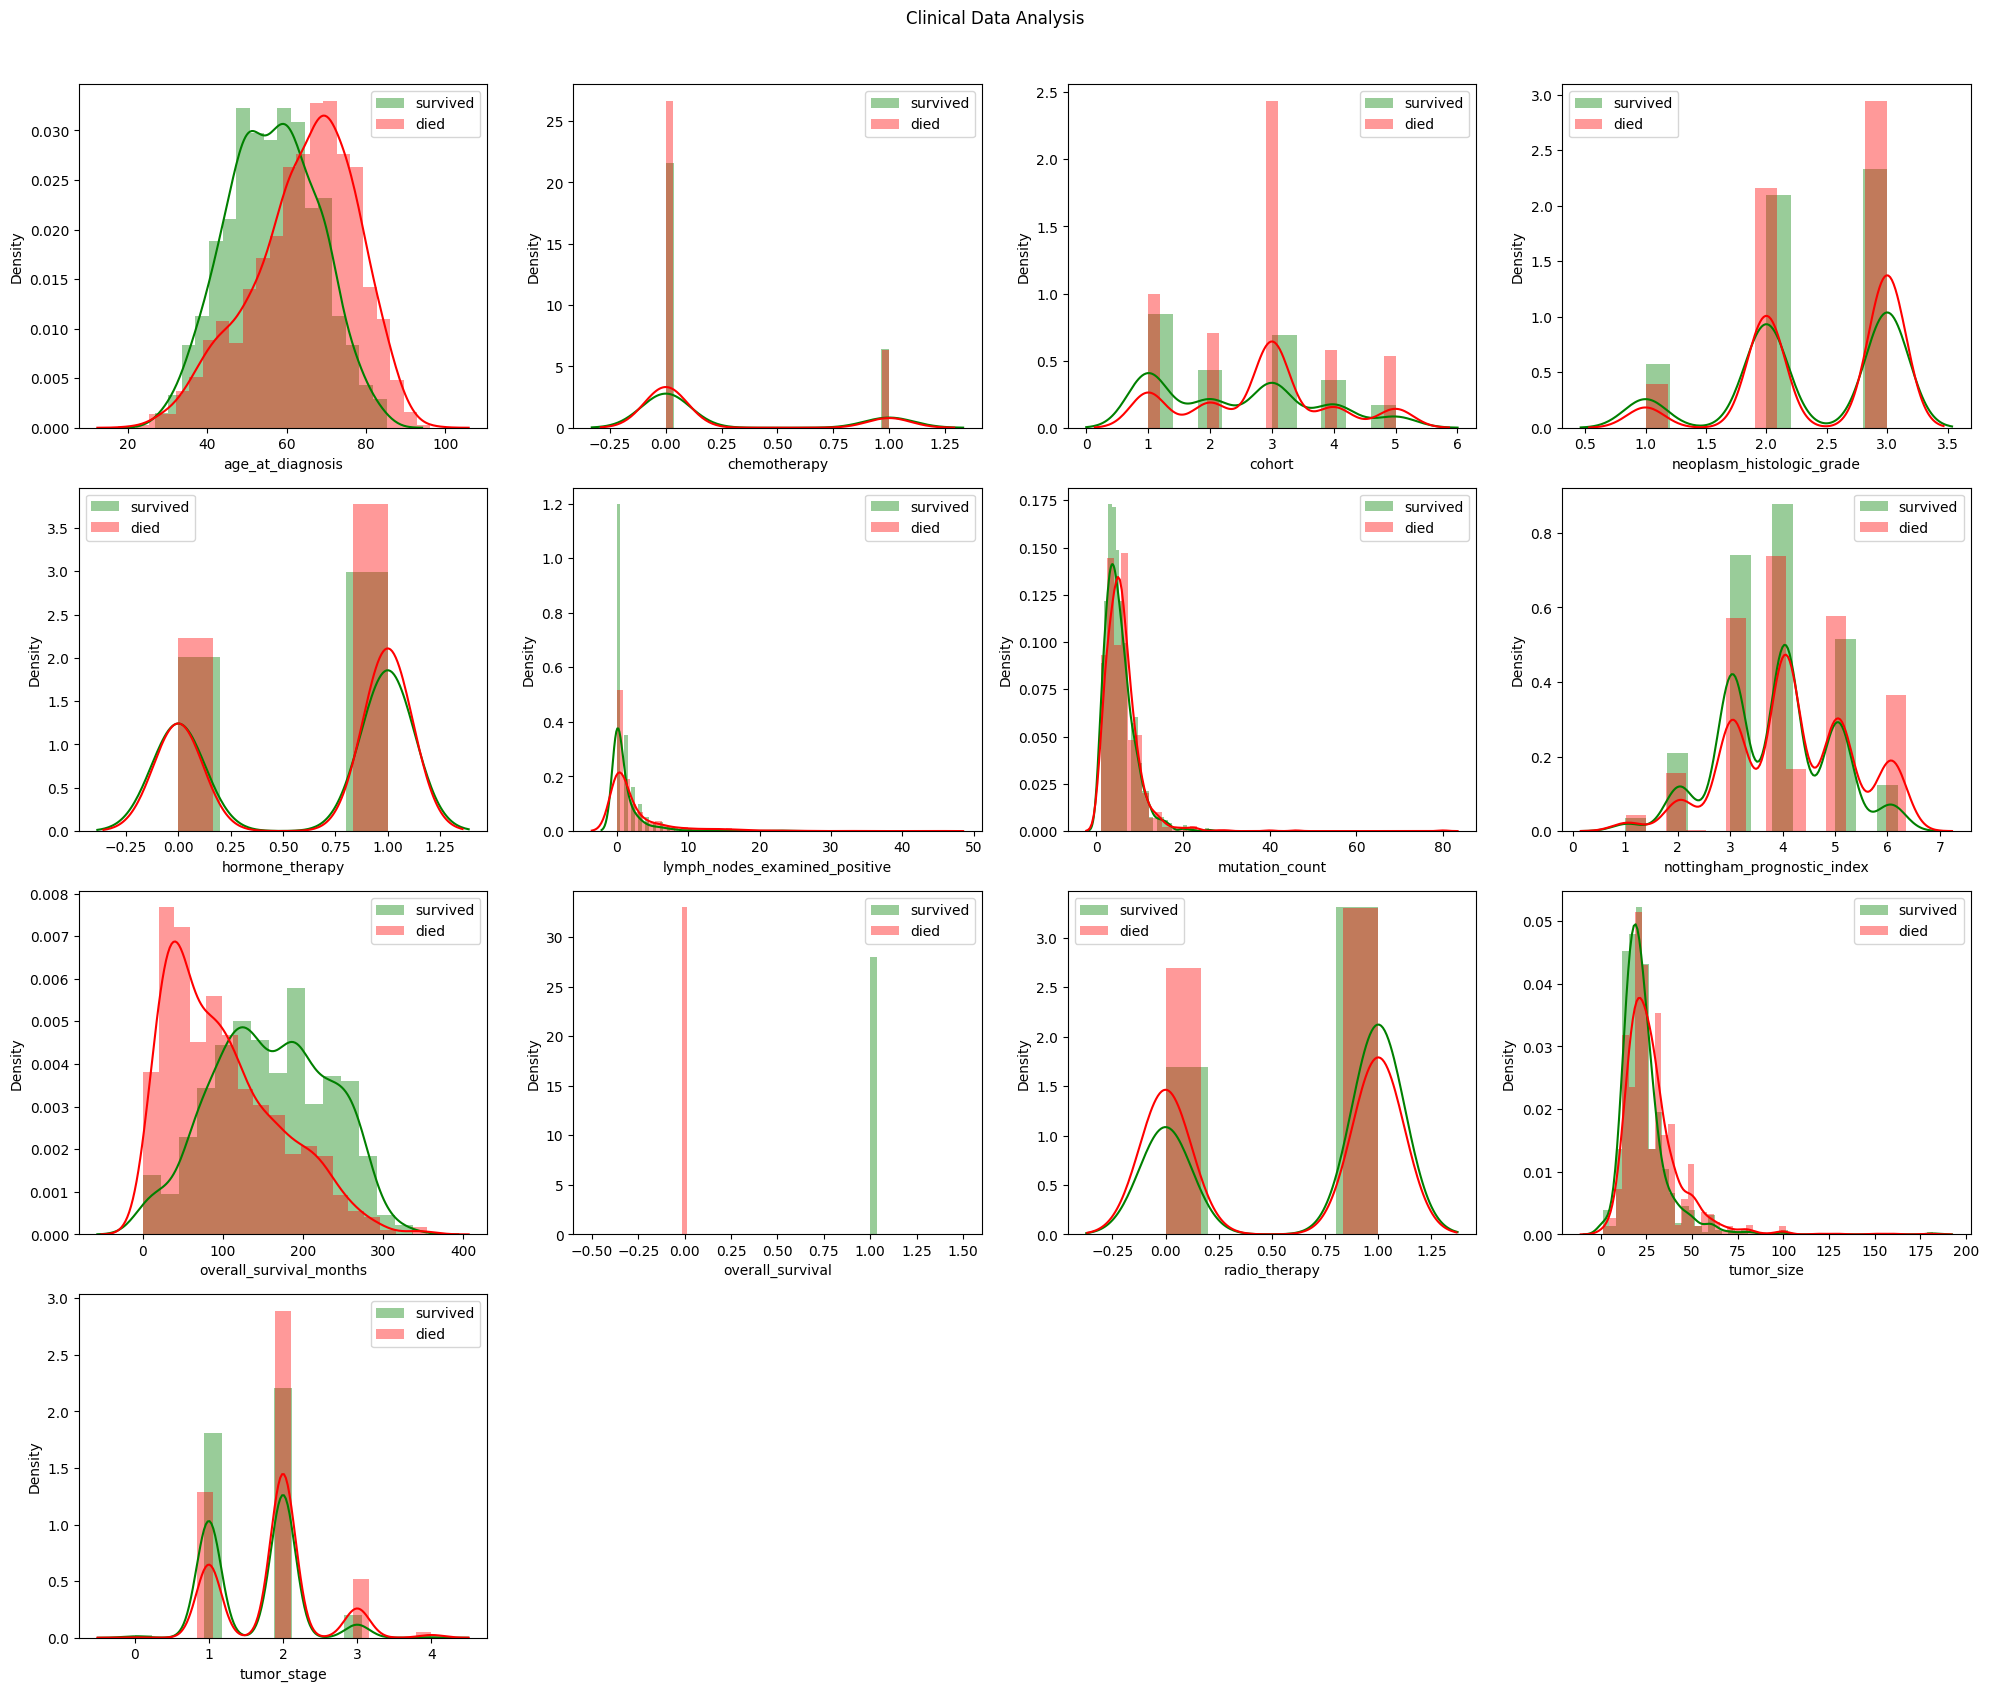

In [ ]:
# Define figure size
fig = plt.figure(figsize=(20, 25))

# Define columns of interest
num_clinical_columns = [
    "age_at_diagnosis", "chemotherapy", "cohort", "neoplasm_histologic_grade",
    "hormone_therapy", "lymph_nodes_examined_positive", "mutation_count",
    "nottingham_prognostic_index", "overall_survival_months", "overall_survival",
    "radio_therapy", "tumor_size", "tumor_stage"
]
# Initialize subplot counter
j = 0
# Plot each clinical variable
for i in clinical_df[num_clinical_columns].columns:
    # Create subplot
    plt.subplot(6, 4, j+1)
    j += 1  # Increment counter
    # Plot distribution of each variable based on survival status
    sns.distplot(clinical_df[i][clinical_df['overall_survival']==1], color='g', label='survived')
    sns.distplot(clinical_df[i][clinical_df['overall_survival']==0], color='r', label='died')
    # Add legend
    plt.legend(loc='best')
# Add main title
fig.suptitle('Clinical Data Analysis')
# Adjust layout
fig.tight_layout()
fig.subplots_adjust(top=0.95)
# Show plot
plt.show()


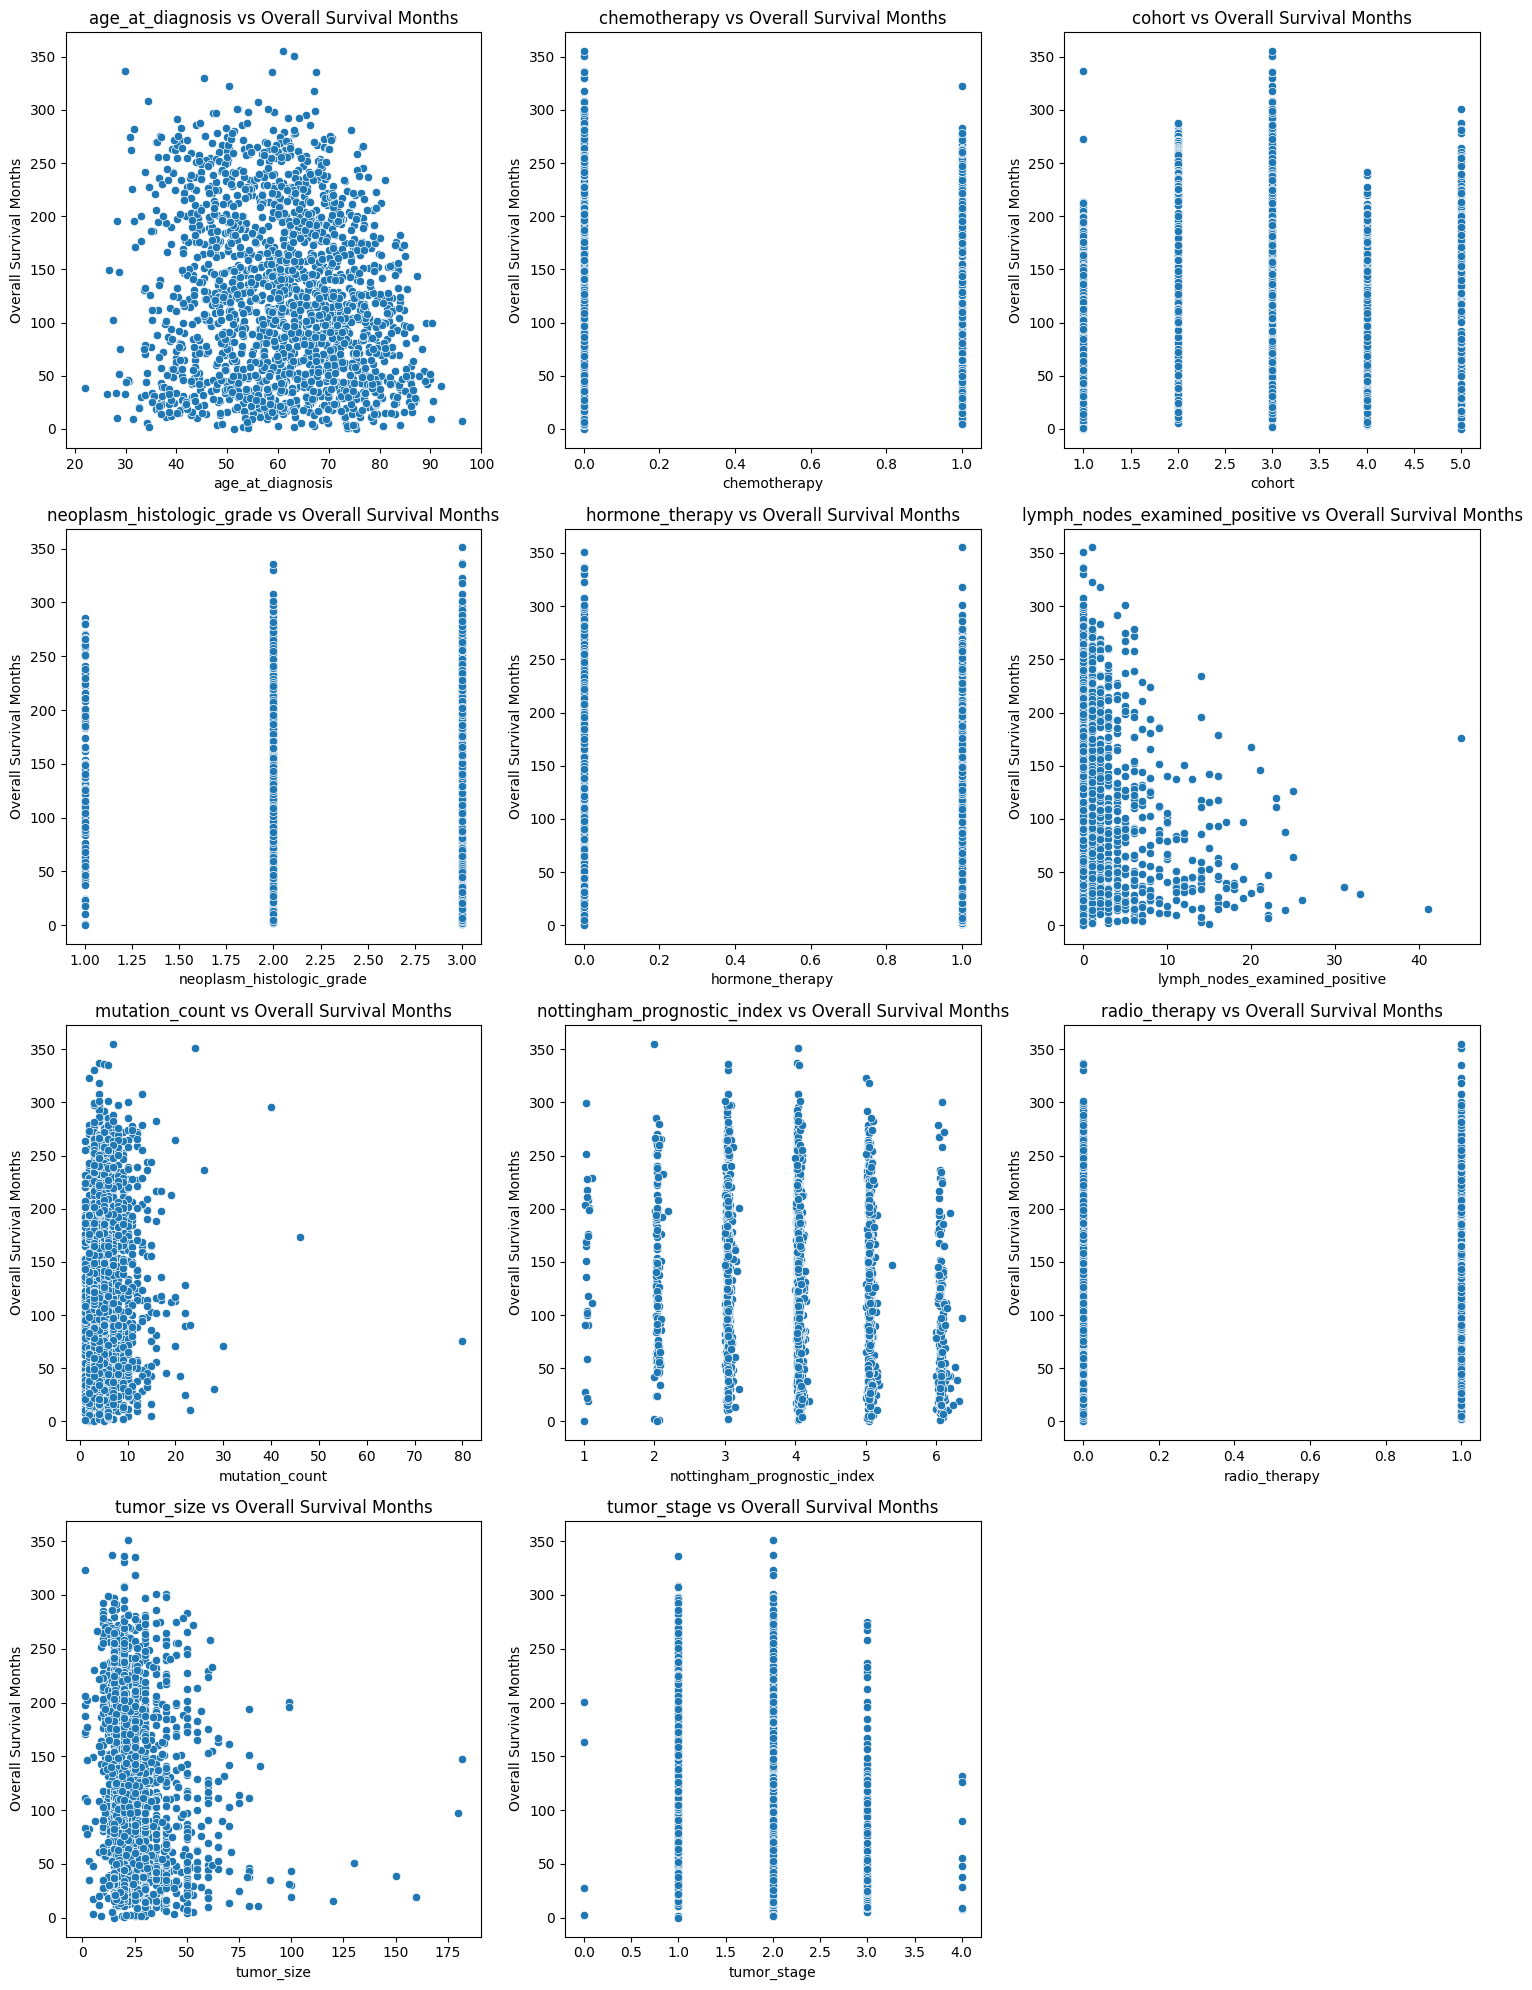

In [ ]:
# Select numerical columns
# Remove 'overall_survival' and 'overall_survival_months' from the list of numerical columns
numerical_columns = clinical_df.select_dtypes(include=['float64', 'int64']).drop(['patient_id','overall_survival', 'overall_survival_months'], axis=1).columns
# Determine the number of rows and columns for subplot grid
num_numerical_columns = len(numerical_columns)
num_rows = (num_numerical_columns + 2) // 3
# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
# Loop through numerical columns and plot relationship with overall_survival_months
for i, column in enumerate(numerical_columns):
    row = i // 3
    col = i % 3
    sns.scatterplot(x=column, y='overall_survival_months', data=clinical_df, ax=axes[row, col])
    axes[row, col].set_title(f'{column} vs Overall Survival Months')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Overall Survival Months')
# Hide empty subplots
for i in range(num_numerical_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()


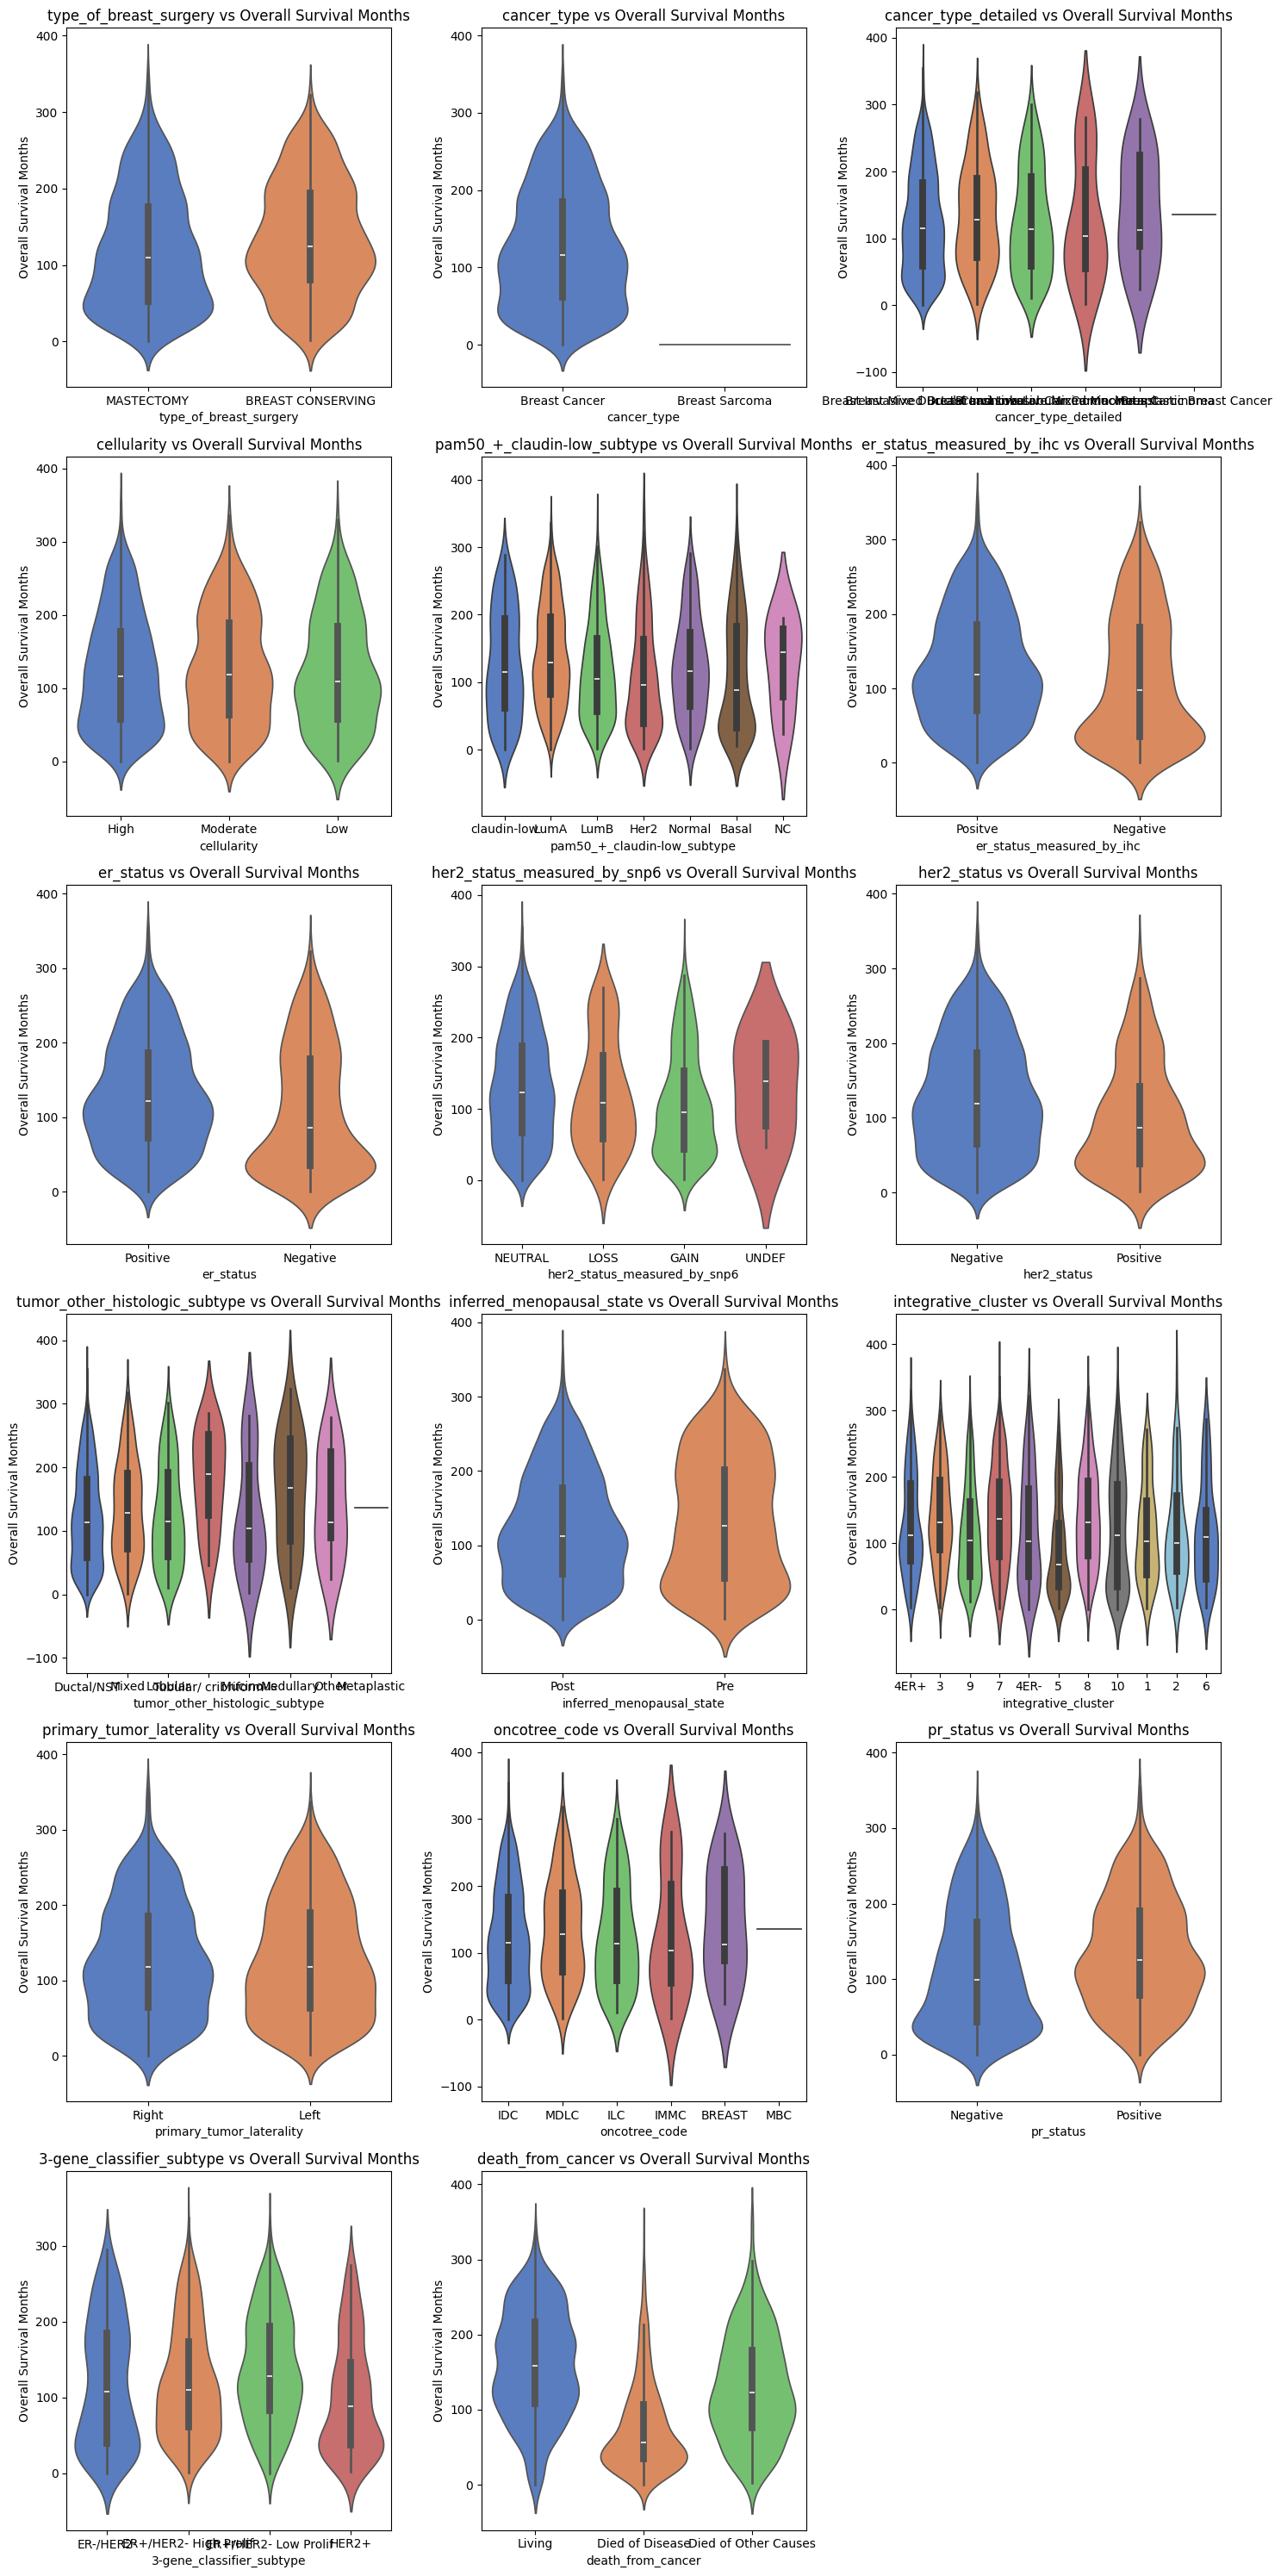

In [ ]:
# Plotting the relationship between object attributes and overall_survival_months
object_columns = clinical_df.select_dtypes(include='object').columns
num_object_columns = len(object_columns)
num_rows = (num_object_columns + 2) // 3  # Calculate number of rows needed for subplot grid

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Loop through object columns and plot relationship with overall_survival_months
for i, column in enumerate(object_columns):
    row = i // 3
    col = i % 3
    sns.violinplot(x=column, y='overall_survival_months', data=clinical_df, ax=axes[row, col], palette='muted')
    axes[row, col].set_title(f'{column} vs Overall Survival Months')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Overall Survival Months')

# Hide empty subplots
for i in range(num_object_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

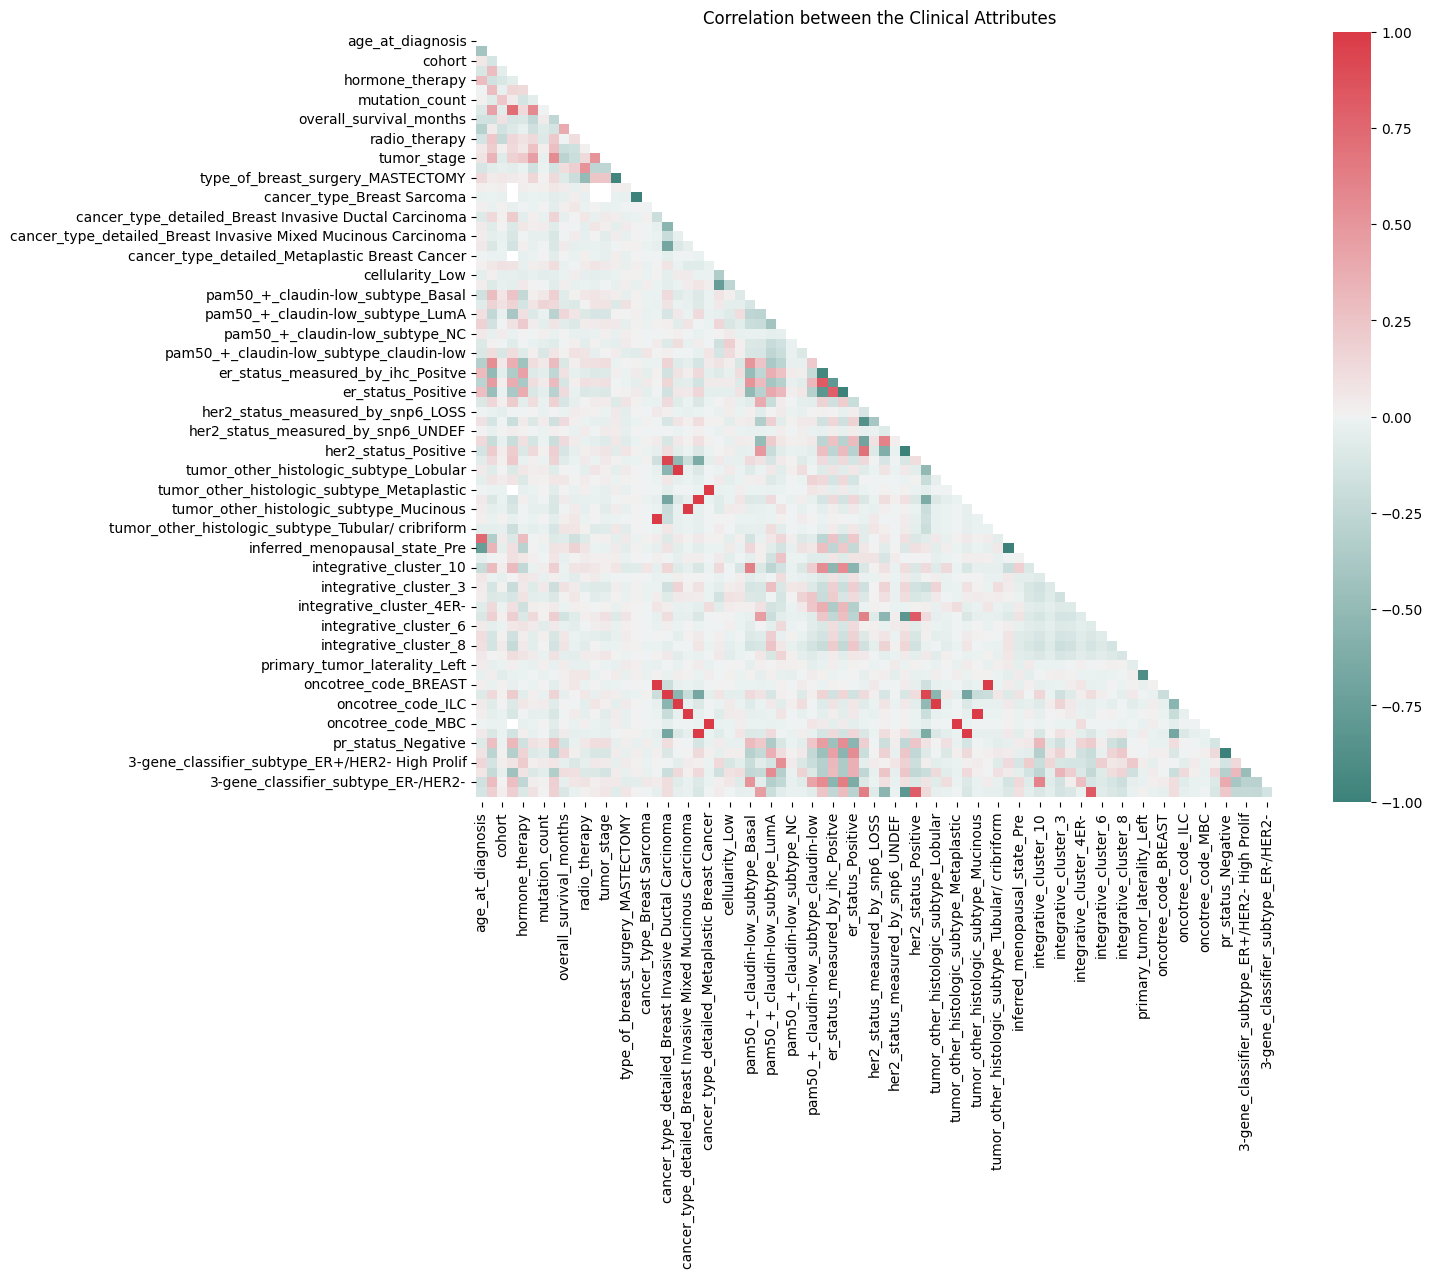

In [ ]:
# Create a figure and axis object with specified size
fig, axs = plt.subplots(figsize=(13, 10))
# Select only the categorical columns
categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
# Specify unwanted columns
unwanted_columns = ['patient_id', 'death_from_cancer']
# Remove unwanted columns from the list of categorical columns
categorical_columns = [col for col in categorical_columns if col not in unwanted_columns]
# Drop unwanted columns and one-hot encode categorical columns
no_id_clinical_df = pd.get_dummies(clinical_df.drop(unwanted_columns, axis=1), columns=categorical_columns)
# Create a mask for upper triangular portion of the correlation matrix
mask = np.triu(np.ones_like(no_id_clinical_df.corr(), dtype=bool))
# Plot heatmap of correlation matrix
sns.heatmap(no_id_clinical_df.corr(), ax=axs, mask=mask, cmap=sns.diverging_palette(180, 10, as_cmap=True))
# Set title for the plot
plt.title('Correlation between the Clinical Attributes')
# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim()  # Discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # Update the ylim(bottom, top) values
# Show the plot
plt.show()


In [ ]:
# Calculate correlation with overall_survival and sort values
Corr_survival = no_id_clinical_df.corr()['overall_survival'].sort_values(ascending=False)
# Select top 10 and bottom 10 correlations
top_10 = Corr_survival.head(10)
bottom_10 = Corr_survival.tail(10)
# Combine top and bottom correlations
Corr_top_bottom = pd.concat([top_10, bottom_10])
# Create a DataFrame to store correlation values
Corr_df = pd.DataFrame({'Correlation': Corr_top_bottom})
# Display the DataFrame
Corr_df


Correlation
overall_survival                                    1.000000
overall_survival_months                             0.384467
type_of_breast_surgery_BREAST CONSERVING            0.187856
inferred_menopausal_state_Pre                       0.170915
radio_therapy                                       0.112083
3-gene_classifier_subtype_ER+/HER2- Low Prolif      0.094463
pam50_+_claudin-low_subtype_claudin-low             0.091397
integrative_cluster_10                              0.076256
pam50_+_claudin-low_subtype_LumA                    0.065186
3-gene_classifier_subtype_ER-/HER2-                 0.065135
pam50_+_claudin-low_subtype_Her2                   -0.091694
3-gene_classifier_subtype_ER+/HER2- High Prolif    -0.095318
nottingham_prognostic_index                        -0.138000
cohort                                             -0.149645
tumor_size                                         -0.164361
lymph_nodes_examined_positive                      -0.164498
inferred_menopausal_state_Post                     -0.170915
type_of_breast_surgery_MASTECTOMY                  -0.184259
tumor_stage                                        -0.188790
age_at_diagnosis                                   -0.303666

# Part 3: Visualization of Relationship Between Genetic Attributes and Outcomes

In [ ]:
# Dropping mutations
mutation_columns_to_drop = df.columns[520:]
genetic_df = df.drop(mutation_columns_to_drop, axis=1)
# Dropping clinical data
clinical_columns_to_drop = genetic_df.columns[4:35]
genetic_df = genetic_df.drop(clinical_columns_to_drop, axis=1)
# Dropping specific clinical attributes and irrelevant genetic features
attributes_to_drop = ['age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type']
genetic_df = genetic_df.drop(attributes_to_drop, axis=1)
# Dropping additional genetic features
genetic_df = genetic_df.iloc[:, :-174]
# Adding overall survival column
genetic_df['overall_survival'] = df['overall_survival']
genetic_df['overall_survival_months'] = df['overall_survival_months']
# Displaying the resulting DataFrame
genetic_df.head()

patient_id    tp53     atm    cdh1   chek2     nbn     nf1   stk11   bard1  \
0           0  0.3504  1.1517  0.0348  0.1266 -0.8361 -0.8578 -0.4294 -1.1201   
1           2 -0.0136 -0.2659  1.3594  0.7961  0.5419 -2.6059  0.5120  0.4390   
2           5  0.5141 -0.0803  1.1398  0.4187 -0.4030 -1.1305  0.2362 -0.1721   
3           6  1.6708 -0.8880  1.2491 -1.1889 -0.4174 -0.6165  1.0078 -0.4010   
4           8  0.3484  0.3897  0.9131  0.9356  0.7675 -0.2940 -0.2961  0.6320   

     mlh1  ...  tubb4b  twist1  adgra2    afdn    aff2    agmo   agtr2  \
0 -0.4844  ... -0.4113  2.8096  2.8014 -0.0004  0.9673  0.3011 -0.8436   
1  1.2266  ...  0.7791 -0.2273 -0.4462 -1.9854  0.5022 -0.9526 -1.8435   
2 -1.7910  ... -0.6572  0.1984 -1.0721 -0.9729  0.0515  0.1109  0.9874   
3 -1.3905  ... -0.4413  0.1932 -1.0215  0.4553 -0.2354  0.4003  1.4839   
4 -0.3582  ... -1.4697  0.4128 -1.5326 -0.4795  1.0052  0.9739  0.8825   

    ahnak  overall_survival  overall_survival_months  
0  1.8227                 1               140.500000  
1  1.6662                 1                84.633333  
2 -0.0154                 0               163.700000  
3  0.3101                 1               164.933333  
4 -0.7598                 0                41.366667  

[5 rows x 314 columns]

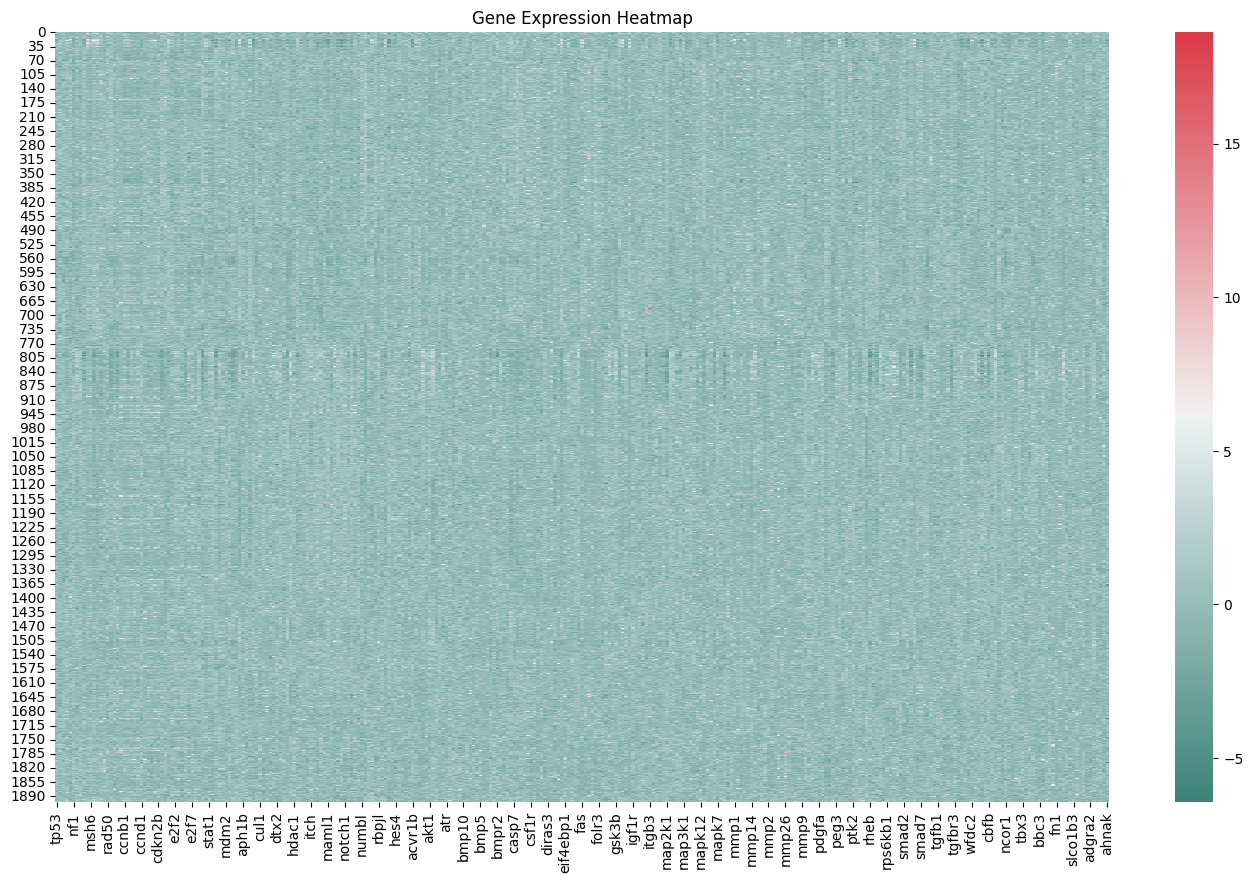

In [ ]:
# Visualizing the mRNA values in a heatmap
fig, axs = plt.subplots(figsize=(17, 10))
sns.heatmap(genetic_df.drop(['patient_id', 'overall_survival', 'overall_survival_months'], axis=1), ax=axs, cmap=sns.diverging_palette(180, 10, as_cmap=True))
plt.title('Gene Expression Heatmap')
# Fix for mpl bug that cuts off top/bottom of seaborn viz
bottom, top = plt.ylim()  # Discover the values for bottom and top
bottom += 0.5  # Add 0.5 to the bottom
top -= 0.5  # Subtract 0.5 from the top
plt.ylim(bottom, top)  # Update the ylim(bottom, top) values
plt.show()


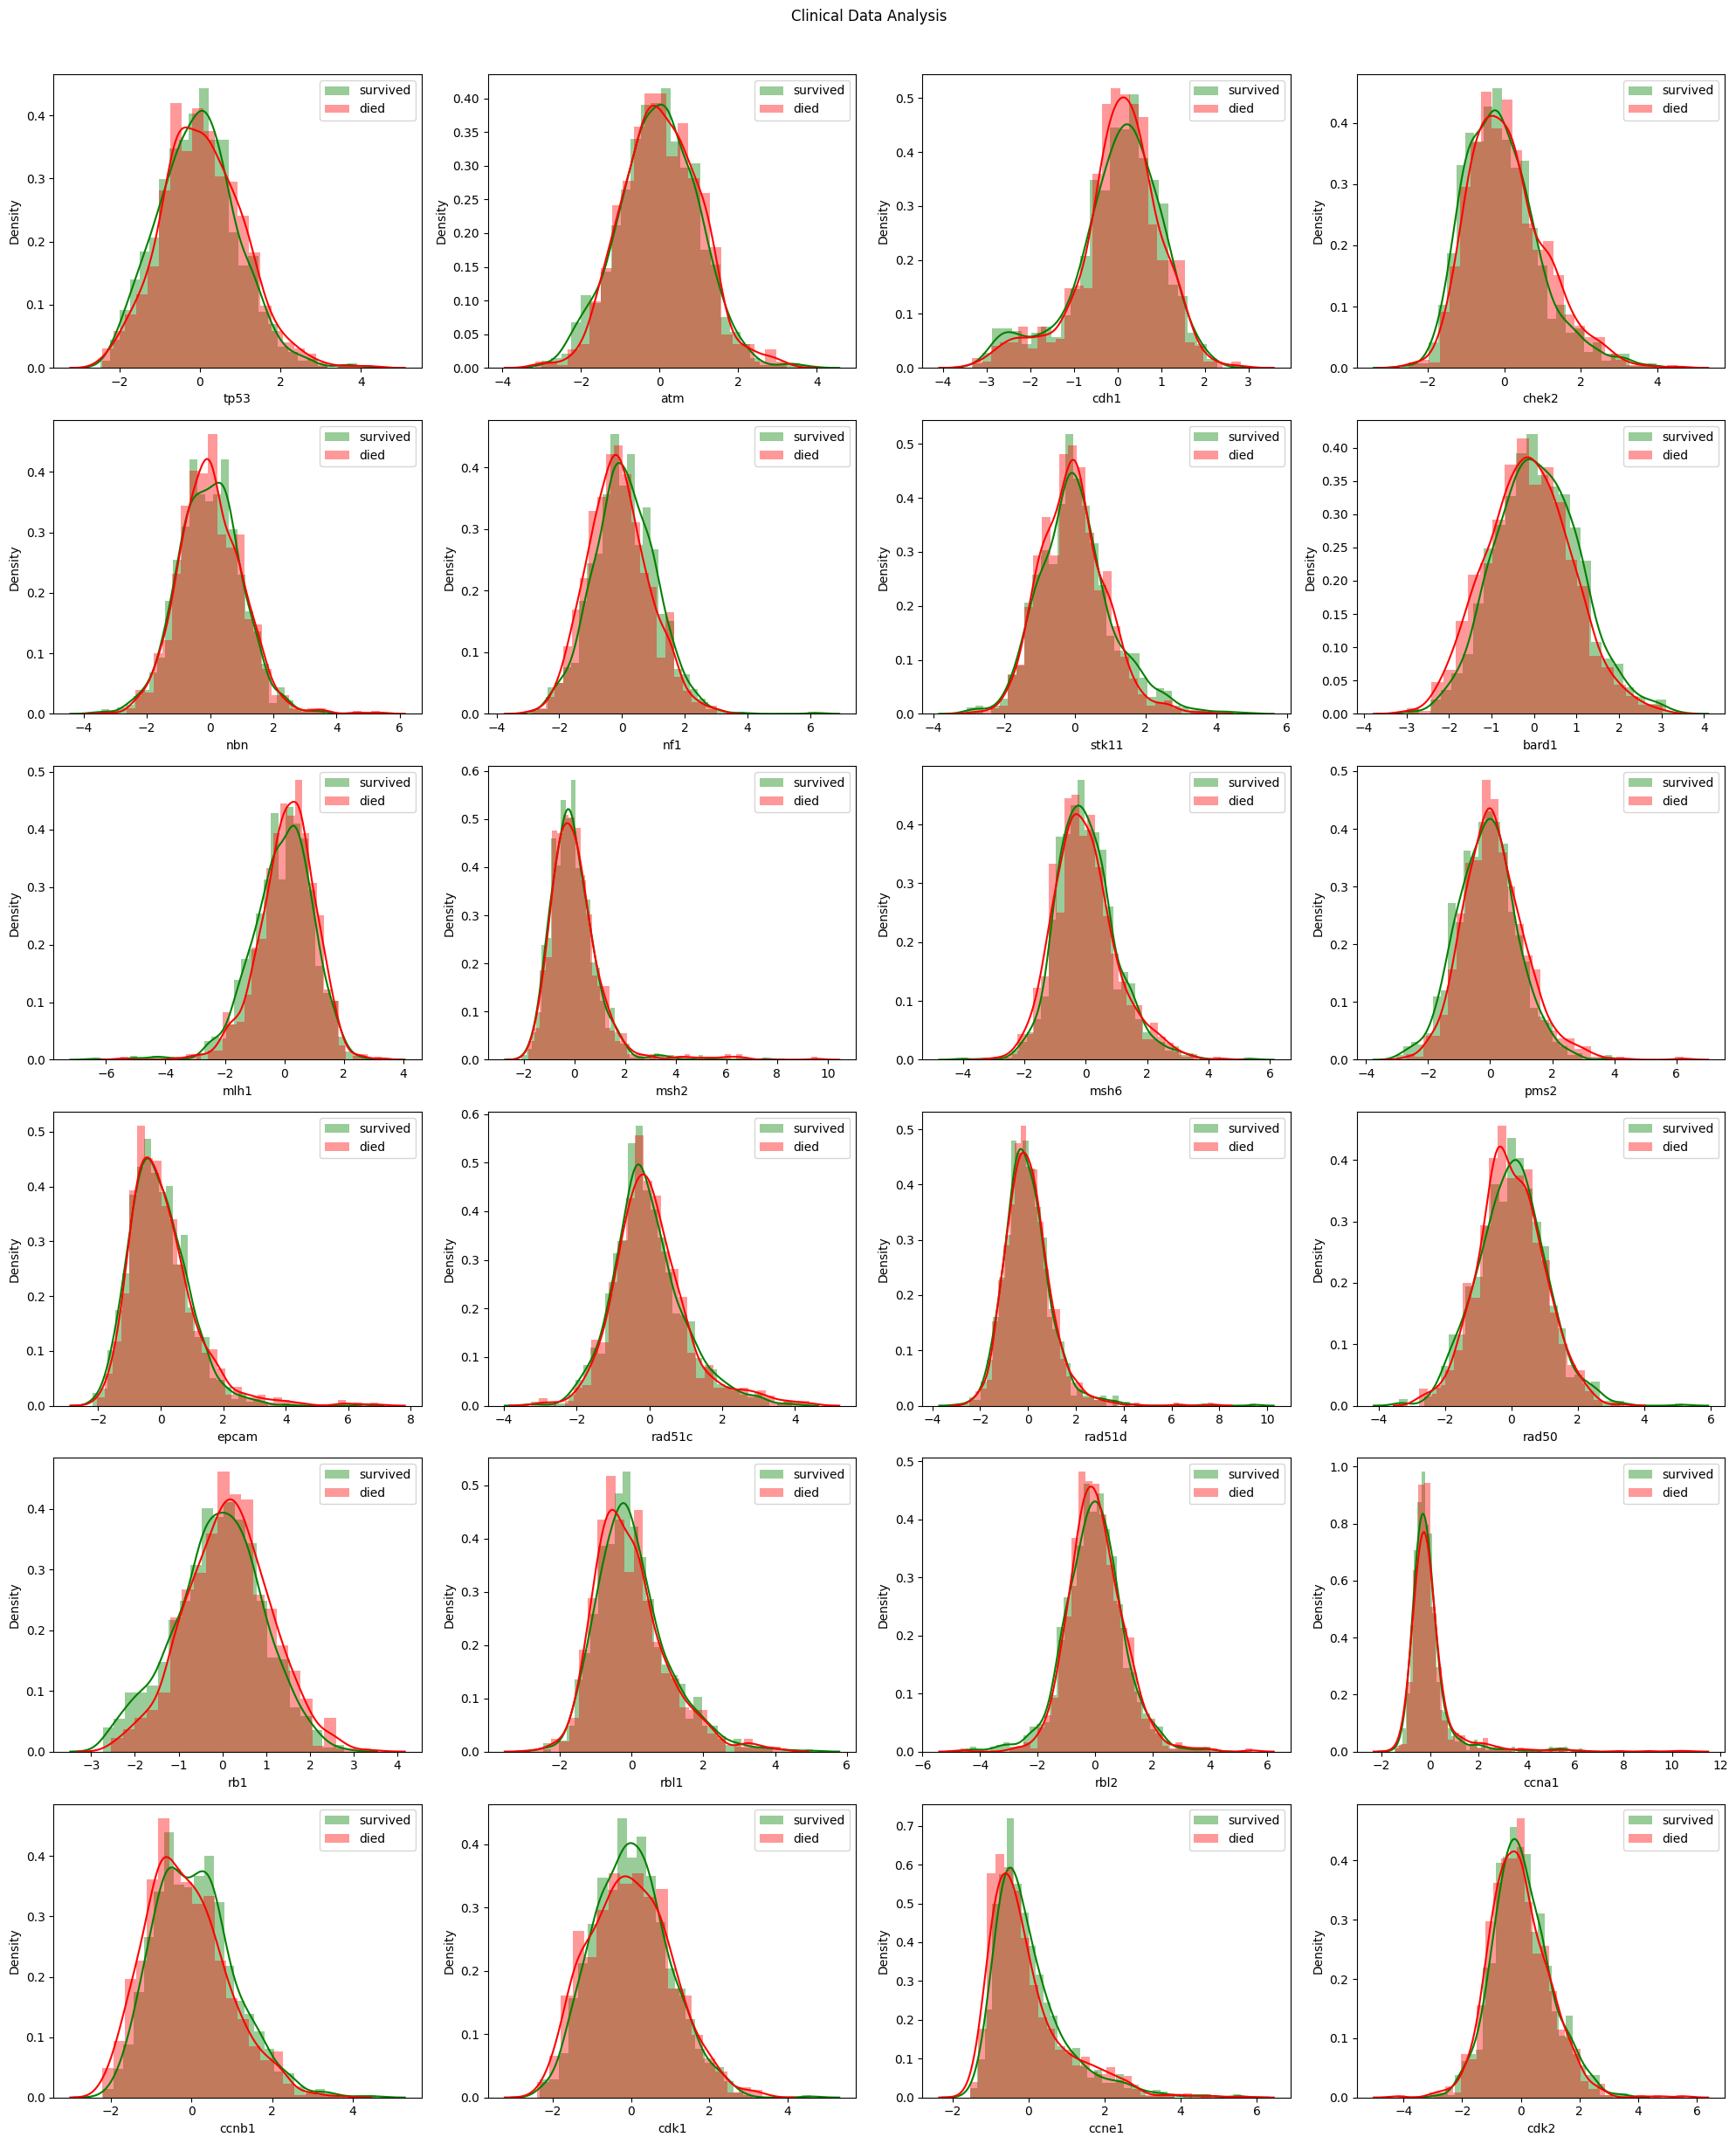

In [ ]:
fig, axs = plt.subplots(6, 4, figsize=(20, 25))

# Define the gene list
gene_list = genetic_df.drop(['patient_id', 'overall_survival', 'overall_survival_months'], axis=1).columns

# Loop through the gene list and create subplots
for i in range(6):
    for j in range(4):
        if len(gene_list) > i*4 + j:
            sns.distplot(genetic_df[gene_list[i*4 + j]][genetic_df['overall_survival'] == 0], color='g', label='survived', ax=axs[i, j])
            sns.distplot(genetic_df[gene_list[i*4 + j]][genetic_df['overall_survival'] == 1], color='r', label='died', ax=axs[i, j])
            axs[i, j].legend(loc='best')

# Add title and adjust layout
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

# Show the plot
plt.show()


In [ ]:
# Selecting object columns
object_columns = genetic_df.drop(['patient_id', 'overall_survival', 'overall_survival_months'], axis=1).columns

# Calculate the number of rows needed for subplot grid
num_object_columns = len(object_columns)
num_rows = (num_object_columns + 2) // 3

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Loop through object columns and plot relationship with overall_survival_months
for i, column in enumerate(object_columns):
    row = i // 3
    col = i % 3
    sns.scatterplot(x=column, y='overall_survival_months', data=genetic_df, ax=axes[row, col], palette='muted')
    axes[row, col].set_title(f'{column} vs Overall Survival Months')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Overall Survival Months')

# Hide empty subplots
for i in range(num_object_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Part 4: Clinical Features Predcition

In [ ]:
# Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/COMS_4761_Bioinformatics_Project/data/METABRIC_RNA_Mutation.csv')
# create a new dataframe for clinical attributes only
clinical_features_to_drop = df.columns[31:] # non clinical attributes
clinical_df = df.drop(clinical_features_to_drop, axis=1)
clinical_df.head()

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                 claudin-low     1.0                   Positve  ...   
1                        LumA     1.0                   Positve  ...   
2                        LumB     1.0                   Positve  ...   
3                        LumB     1.0                   Positve  ...   
4                        LumB     1.0                   Positve  ...   

  nottingham_prognostic_index  oncotree_code overall_survival_months  \
0                       6.044            IDC              140.500000   
1                       4.020            IDC               84.633333   
2                       4.030            IDC              163.700000   
3                       4.050           MDLC              164.933333   
4                       6.080           MDLC               41.366667   

  overall_survival pr_status  radio_therapy 3-gene_classifier_subtype  \
0                1  Negative              1                 ER-/HER2-   
1                1  Positive              1     ER+/HER2- High Prolif   
2                0  Positive              0                       NaN   
3                1  Positive              1                       NaN   
4                0  Positive              1     ER+/HER2- High Prolif   

  tumor_size tumor_stage  death_from_cancer  
0       22.0         2.0             Living  
1       10.0         1.0             Living  
2       15.0         2.0    Died of Disease  
3       25.0         2.0             Living  
4       40.0         2.0    Died of Disease  

[5 rows x 31 columns]

In [ ]:
categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
print("Check Parameter Names: ", categorical_columns)
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns]
# Getting dummies for all categorical columns
dummies_clinical_df = pd.get_dummies(clinical_df.drop('patient_id',axis=1 ), columns= categorical_columns, dummy_na=True)
dummies_clinical_df.dropna(inplace = True)
dummies_clinical_df

Check Parameter Names:  ['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc', 'er_status', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code', 'pr_status', '3-gene_classifier_subtype', 'death_from_cancer']


age_at_diagnosis  chemotherapy  cohort  neoplasm_histologic_grade  \
1                43.19             0     1.0                        3.0   
2                48.87             1     1.0                        2.0   
3                47.68             1     1.0                        2.0   
4                76.97             1     1.0                        3.0   
5                78.77             0     1.0                        3.0   
...                ...           ...     ...                        ...   
1619             70.65             0     5.0                        1.0   
1621             75.62             0     5.0                        3.0   
1623             52.84             1     5.0                        2.0   
1628             48.59             1     5.0                        3.0   
1664             63.20             0     5.0                        2.0   

      hormone_therapy  lymph_nodes_examined_positive  mutation_count  \
1                   1                            0.0             2.0   
2                   1                            1.0             2.0   
3                   1                            3.0             1.0   
4                   1                            8.0             2.0   
5                   1                            0.0             4.0   
...               ...                            ...             ...   
1619                0                            0.0             9.0   
1621                0                            0.0             4.0   
1623                0                            6.0             5.0   
1628                0                            1.0             6.0   
1664                0                            0.0             3.0   

      nottingham_prognostic_index  overall_survival_months  overall_survival  \
1                           4.020                84.633333                 1   
2                           4.030               163.700000                 0   
3                           4.050               164.933333                 1   
4                           6.080                41.366667                 0   
5                           4.062                 7.800000                 0   
...                           ...                      ...               ...   
1619                        2.040               201.166667                 1   
1621                        4.040               105.200000                 0   
1623                        5.040               200.333333                 1   
1628                        5.060                14.700000                 0   
1664                        3.044               281.500000                 1   

      ...  oncotree_code_MDLC  oncotree_code_nan  pr_status_Negative  \
1     ...               False              False               False   
2     ...               False              False               False   
3     ...                True              False               False   
4     ...                True              False               False   
5     ...               False              False               False   
...   ...                 ...                ...                 ...   
1619  ...                True              False               False   
1621  ...               False              False                True   
1623  ...                True              False               False   
1628  ...               False              False                True   
1664  ...               False              False               False   

     pr_status_Positive  pr_status_nan  \
1                  True          False   
2                  True          False   
3                  True          False   
4                  True          False   
5                  True          False   
...                 ...            ...   
1619               True          False   
1621              False          False   
1623               True          Fal

In [ ]:
# data splitting
X_clinical = dummies_clinical_df.drop(['age_at_diagnosis', 'death_from_cancer', 'overall_survival', 'overall_survival_months'], axis=1)
y_clinical = dummies_clinical_df['overall_survival_months']
# using stratify for y because we need the distribution of the two classes to be equal in train and test sets.
X_clinical_train, X_clinical_test, y_clinical_train, y_clinical_test = train_test_split(X_clinical, y_clinical, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate the linear regression model
lr = LinearRegression()

# Fit the model on the training dataset
lr.fit(X_clinical_train, y_clinical_train)

# Make predictions on the training dataset
y_train_pred = lr.predict(X_clinical_train)

# Make predictions on the test dataset
y_test_pred = lr.predict(X_clinical_test)

# Define the percentage range for evaluation
percentage_range = 0.70

# Calculate the absolute percentage error for training and test datasets
train_absolute_percentage_error = np.abs((y_clinical_train - y_train_pred) / y_clinical_train)
test_absolute_percentage_error = np.abs((y_clinical_test - y_test_pred) / y_clinical_test)

# Count the number of predictions within the defined range for training and test datasets
train_correct_predictions = np.sum(train_absolute_percentage_error <= percentage_range)
test_correct_predictions = np.sum(test_absolute_percentage_error <= percentage_range)

# Calculate the percentage of correct predictions
train_percentage_correct = train_correct_predictions / len(y_clinical_train) * 100
test_percentage_correct = test_correct_predictions / len(y_clinical_test) * 100

# Print the results
print("Percentage of Train Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, train_percentage_correct))
print("Percentage of Test Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, test_percentage_correct))

Percentage of Train Predictions Within 70.0% Range: 70.11%
Percentage of Test Predictions Within 70.0% Range: 68.70%


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the Decision Tree Regression model
dt = DecisionTreeRegressor()

# Fit the model on the training dataset
dt.fit(X_clinical_train, y_clinical_train)

# Make predictions on the training dataset
y_train_pred = dt.predict(X_clinical_train)

# Make predictions on the test dataset
y_test_pred = dt.predict(X_clinical_test)

# Define the percentage range for evaluation
percentage_range = 0.10

# Calculate the absolute percentage error for training and test datasets
train_absolute_percentage_error = np.abs((y_clinical_train - y_train_pred) / y_clinical_train)
test_absolute_percentage_error = np.abs((y_clinical_test - y_test_pred) / y_clinical_test)

# Count the number of predictions within the defined range for training and test datasets
train_correct_predictions = np.sum(train_absolute_percentage_error <= percentage_range)
test_correct_predictions = np.sum(test_absolute_percentage_error <= percentage_range)

# Calculate the percentage of correct predictions
train_percentage_correct = train_correct_predictions / len(y_clinical_train) * 100
test_percentage_correct = test_correct_predictions / len(y_clinical_test) * 100

# Print the results
print("Percentage of Train Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, train_percentage_correct))
print("Percentage of Test Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, test_percentage_correct))

Percentage of Train Predictions Within 10.0% Range: 100.00%
Percentage of Test Predictions Within 10.0% Range: 10.31%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the Random Forest Regression model
rf = RandomForestRegressor()

# Fit the model on the training dataset
rf.fit(X_clinical_train, y_clinical_train)

# Make predictions on the training dataset
y_train_pred = rf.predict(X_clinical_train)

# Make predictions on the test dataset
y_test_pred = rf.predict(X_clinical_test)

# Define the percentage range for evaluation
percentage_range = 0.10

# Calculate the absolute percentage error for training and test datasets
train_absolute_percentage_error = np.abs((y_clinical_train - y_train_pred) / y_clinical_train)
test_absolute_percentage_error = np.abs((y_clinical_test - y_test_pred) / y_clinical_test)

# Count the number of predictions within the defined range for training and test datasets
train_correct_predictions = np.sum(train_absolute_percentage_error <= percentage_range)
test_correct_predictions = np.sum(test_absolute_percentage_error <= percentage_range)

# Calculate the percentage of correct predictions
train_percentage_correct = train_correct_predictions / len(y_clinical_train) * 100
test_percentage_correct = test_correct_predictions / len(y_clinical_test) * 100

# Print the results
print("Percentage of Train Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, train_percentage_correct))
print("Percentage of Test Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, test_percentage_correct))

Percentage of Train Predictions Within 10.0% Range: 34.00%
Percentage of Test Predictions Within 10.0% Range: 14.12%


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Instantiate the SVR model
svr = SVR()

# Fit the model on the training dataset
svr.fit(X_clinical_train, y_clinical_train)

# Make predictions on the training dataset
y_train_pred = svr.predict(X_clinical_train)

# Make predictions on the test dataset
y_test_pred = svr.predict(X_clinical_test)

# Define the percentage range for evaluation
percentage_range = 0.70

# Calculate the absolute percentage error for training and test datasets
train_absolute_percentage_error = np.abs((y_clinical_train - y_train_pred) / y_clinical_train)
test_absolute_percentage_error = np.abs((y_clinical_test - y_test_pred) / y_clinical_test)

# Count the number of predictions within the defined range for training and test datasets
train_correct_predictions = np.sum(train_absolute_percentage_error <= percentage_range)
test_correct_predictions = np.sum(test_absolute_percentage_error <= percentage_range)

# Calculate the percentage of correct predictions
train_percentage_correct = train_correct_predictions / len(y_clinical_train) * 100
test_percentage_correct = test_correct_predictions / len(y_clinical_test) * 100

# Print the results
print("Percentage of Train Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, train_percentage_correct))
print("Percentage of Test Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, test_percentage_correct))

Percentage of Train Predictions Within 70.0% Range: 71.06%
Percentage of Test Predictions Within 70.0% Range: 72.14%


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the Gradient Boosting Regression model
gb = GradientBoostingRegressor()

# Fit the model on the training dataset
gb.fit(X_clinical_train, y_clinical_train)

# Make predictions on the training dataset
y_train_pred = gb.predict(X_clinical_train)

# Make predictions on the test dataset
y_test_pred = gb.predict(X_clinical_test)

# Define the percentage range for evaluation
percentage_range = 0.10

# Calculate the absolute percentage error for training and test datasets
train_absolute_percentage_error = np.abs((y_clinical_train - y_train_pred) / y_clinical_train)
test_absolute_percentage_error = np.abs((y_clinical_test - y_test_pred) / y_clinical_test)

# Count the number of predictions within the defined range for training and test datasets
train_correct_predictions = np.sum(train_absolute_percentage_error <= percentage_range)
test_correct_predictions = np.sum(test_absolute_percentage_error <= percentage_range)

# Calculate the percentage of correct predictions
train_percentage_correct = train_correct_predictions / len(y_clinical_train) * 100
test_percentage_correct = test_correct_predictions / len(y_clinical_test) * 100

# Print the results
print("Percentage of Train Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, train_percentage_correct))
print("Percentage of Test Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, test_percentage_correct))

Percentage of Train Predictions Within 10.0% Range: 13.85%
Percentage of Test Predictions Within 10.0% Range: 9.54%


# Part 5: Clinical & Genetic Features Predcition

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/COMS_4761_Bioinformatics_Project/data/METABRIC_RNA_Mutation.csv')
# Print the number of variables (columns) in the DataFrame
print("Number of variables (columns):", len(df.columns))

Number of variables (columns): 693


In [ ]:
features_to_drop = df.columns[100:]
df = df.drop(features_to_drop, axis=1)
print("Number of variables (columns):", len(df.columns))

Number of variables (columns): 100


In [ ]:
# Load the Dataset
all_columns = df.select_dtypes(include=['category', 'object', 'float', 'int']).columns.tolist()
unwanted_columns = ['patient_id','age_at_diagnosis', 'death_from_cancer', 'overall_survival_months']
all_selected_columns = [ele for ele in all_columns if ele not in unwanted_columns]
print("Check All Parameters: ", all_columns)
selected_dummies_df = pd.get_dummies(df.drop('patient_id',axis=1 ), columns= all_selected_columns, dummy_na=True)
selected_dummies_df.dropna(inplace = True)
selected_dummies_df

Check All Parameters:  ['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy', 'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'hormone_therapy', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'oncotree_code', 'overall_survival_months', 'overall_survival', 'pr_status', 'radio_therapy', '3-gene_classifier_subtype', 'tumor_size', 'tumor_stage', 'death_from_cancer', 'brca1', 'brca2', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2', 'nbn', 'nf1', 'stk11', 'bard1', 'mlh1', 'msh2', 'msh6', 'pms2', 'epcam', 'rad51c', 'rad51d', 'rad50', 'rb1', 'rbl1', 'rbl2', 'ccna1', 'ccnb1', 'cdk1', 'ccne1', 'cdk2', 'cdc25a', 'ccnd1', 'cdk4', 'cdk6', 'ccnd2', 'cdkn2a', 'cdkn2b', 

age_at_diagnosis  overall_survival_months     death_from_cancer  \
0                75.65               140.500000                Living   
1                43.19                84.633333                Living   
2                48.87               163.700000       Died of Disease   
3                47.68               164.933333                Living   
4                76.97                41.366667       Died of Disease   
...                ...                      ...                   ...   
1899             43.10               196.866667                Living   
1900             42.88                44.733333       Died of Disease   
1901             62.90               175.966667       Died of Disease   
1902             61.16                86.233333  Died of Other Causes   
1903             60.02               201.900000  Died of Other Causes   

      type_of_breast_surgery_BREAST CONSERVING  \
0                                        False   
1                                         True   
2                                        False   
3                                        False   
4                                        False   
...                                        ...   
1899                                      True   
1900                                     False   
1901                                     False   
1902                                     False   
1903                                      True   

      type_of_breast_surgery_MASTECTOMY  type_of_breast_surgery_nan  \
0                                  True                       False   
1                                 False                       False   
2                                  True                       False   
3                                  True                       False   
4                                  True                       False   
...                                 ...                         ...   
1899                              False                       False   
1900                               True                       False   
1901                               True                       False   
1902                               True                       False   
1903                              False                       False   

      cancer_type_Breast Cancer  cancer_type_Breast Sarcoma  cancer_type_nan  \
0                          True                       False            False   
1                          True                       False            False   
2                          True                       False            False   
3                          True                       False            False   
4                          True                       False            False   
...                         ...                         ...              ...   
1899                       True                       False            False   
1900                       True                       False            False   
1901                       True                       False            False   
1902                       True                       False            False   
1903                       True                       False            False   

      cancer_type_detailed_Breast  ...  dtx1_4.8083  dtx1_4.8261  dtx1_5.0188  \
0                           False  ...        False        False        False   
1                           False  ...        False        False        False   
2                           False  ...        False        False        False   
3                           False  ...        False        False        False   
4                           False  ...        False        False        False   
...                           ...  ...          ...          ...          ...   
1899                        False  ...        False        False        False   
1900                        False  ...        False        False  

In [ ]:
# data splitting
X_selected = selected_dummies_df.drop(['overall_survival_months','age_at_diagnosis', 'death_from_cancer',], axis=1)
y_selected = selected_dummies_df['overall_survival_months']
# using stratify for y because we need the distribution of the two classes to be equal in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate the linear regression model
lr = LinearRegression()

# Fit the model on the training dataset
lr.fit(X_train, y_train)

# Make predictions on the training dataset
y_train_pred = lr.predict(X_train)

# Make predictions on the test dataset
y_test_pred = lr.predict(X_test)

# Define the percentage range for evaluation
percentage_range = 0.10

# Calculate the absolute percentage error for training and test datasets
train_absolute_percentage_error = np.abs((y_train - y_train_pred) / y_train)
test_absolute_percentage_error = np.abs((y_test - y_test_pred) / y_test)

# Count the number of predictions within the defined range for training and test datasets
train_correct_predictions = np.sum(train_absolute_percentage_error <= percentage_range)
test_correct_predictions = np.sum(test_absolute_percentage_error <= percentage_range)

# Calculate the percentage of correct predictions
train_percentage_correct = train_correct_predictions / len(y_train) * 100
test_percentage_correct = test_correct_predictions / len(y_test) * 100

# Print the results
print("Percentage of Train Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, train_percentage_correct))
print("Percentage of Test Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, test_percentage_correct))

Percentage of Train Predictions Within 10.0% Range: 99.93%
Percentage of Test Predictions Within 10.0% Range: 14.17%


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the decision tree regression model
dt = DecisionTreeRegressor()

# Fit the model on the training dataset
dt.fit(X_train, y_train)

# Make predictions on the training dataset
y_train_pred = dt.predict(X_train)

# Make predictions on the test dataset
y_test_pred = dt.predict(X_test)

# Calculate the absolute percentage error for training and test datasets
train_absolute_percentage_error = np.abs((y_train - y_train_pred) / y_train)
test_absolute_percentage_error = np.abs((y_test - y_test_pred) / y_test)

# Count the number of predictions within the defined range for training and test datasets
train_correct_predictions = np.sum(train_absolute_percentage_error <= percentage_range)
test_correct_predictions = np.sum(test_absolute_percentage_error <= percentage_range)

# Calculate the percentage of correct predictions
train_percentage_correct = train_correct_predictions / len(y_train) * 100
test_percentage_correct = test_correct_predictions / len(y_test) * 100

# Print the results
print("Percentage of Train Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, train_percentage_correct))
print("Percentage of Test Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, test_percentage_correct))

Percentage of Train Predictions Within 10.0% Range: 99.93%
Percentage of Test Predictions Within 10.0% Range: 14.44%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the random forest regression model
rf = RandomForestRegressor()

# Fit the model on the training dataset
rf.fit(X_train, y_train)

# Make predictions on the training dataset
y_train_pred = dt.predict(X_train)

# Make predictions on the test dataset
y_test_pred = dt.predict(X_test)

# Calculate the absolute percentage error for training and test datasets
train_absolute_percentage_error = np.abs((y_train - y_train_pred) / y_train)
test_absolute_percentage_error = np.abs((y_test - y_test_pred) / y_test)

# Count the number of predictions within the defined range for training and test datasets
train_correct_predictions = np.sum(train_absolute_percentage_error <= percentage_range)
test_correct_predictions = np.sum(test_absolute_percentage_error <= percentage_range)

# Calculate the percentage of correct predictions
train_percentage_correct = train_correct_predictions / len(y_train) * 100
test_percentage_correct = test_correct_predictions / len(y_test) * 100

# Print the results
print("Percentage of Train Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, train_percentage_correct))
print("Percentage of Test Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, test_percentage_correct))

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Instantiate the SVR model
svr = SVR()

# Fit the model on the training dataset
svr.fit(X_train, y_train)

# Make predictions on the training dataset
y_train_pred = svr.predict(X_train)

# Make predictions on the test dataset
y_test_pred = svr.predict(X_test)

# Calculate the absolute percentage error for training and test datasets
train_absolute_percentage_error = np.abs((y_train - y_train_pred) / y_train)
test_absolute_percentage_error = np.abs((y_test - y_test_pred) / y_test)

# Count the number of predictions within the defined range for training and test datasets
train_correct_predictions = np.sum(train_absolute_percentage_error <= percentage_range)
test_correct_predictions = np.sum(test_absolute_percentage_error <= percentage_range)

# Calculate the percentage of correct predictions
train_percentage_correct = train_correct_predictions / len(y_train) * 100
test_percentage_correct = test_correct_predictions / len(y_test) * 100

# Print the results
print("Percentage of Train Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, train_percentage_correct))
print("Percentage of Test Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, test_percentage_correct))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instantiate the decision tree regression model
dt = DecisionTreeRegressor()

# Fit the model on the training dataset
dt.fit(X_train, y_train)

# Make predictions on the training dataset
y_train_pred = dt.predict(X_train)

# Make predictions on the test dataset
y_test_pred = dt.predict(X_test)

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Coefficient of Determination (R^2 Score)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Mean Percentage Error (MPE)
mpe_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mpe_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print the results
print("Mean Squared Error (MSE):")
print("  Train: {:.4f}".format(mse_train))
print("  Test: {:.4f}".format(mse_test))
print("\nRoot Mean Squared Error (RMSE):")
print("  Train: {:.4f}".format(rmse_train))
print("  Test: {:.4f}".format(rmse_test))
print("\nMean Absolute Error (MAE):")
print("  Train: {:.4f}".format(mae_train))
print("  Test: {:.4f}".format(mae_test))
print("\nCoefficient of Determination (R^2 Score):")
print("  Train: {:.4f}".format(r2_train))
print("  Test: {:.4f}".format(r2_test))
print("\nMean Percentage Error (MPE):")
print("  Train: {:.2f}%".format(mpe_train))
print("  Test: {:.2f}%".format(mpe_test))

# Calculate other evaluation metrics
# You can calculate Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R^2 Score, and Mean Percentage Error (MPE) similarly.

# Calculate the absolute percentage error for training and test datasets
train_absolute_percentage_error = np.abs((y_train - y_train_pred) / y_train)
test_absolute_percentage_error = np.abs((y_test - y_test_pred) / y_test)

# Define the percentage range for evaluation
percentage_range = 0.10

# Count the number of predictions within the defined range for training and test datasets
train_correct_predictions = np.sum(train_absolute_percentage_error <= percentage_range)
test_correct_predictions = np.sum(test_absolute_percentage_error <= percentage_range)

# Calculate the percentage of correct predictions
train_percentage_correct = train_correct_predictions / len(y_train) * 100
test_percentage_correct = test_correct_predictions / len(y_test) * 100

# Print the results
print("Percentage of Train Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, train_percentage_correct))
print("Percentage of Test Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, test_percentage_correct))


Mean Squared Error (MSE):
  Train: 0.0000
  Test: 5189.3831

Root Mean Squared Error (RMSE):
  Train: 0.0000
  Test: 72.0374

Mean Absolute Error (MAE):
  Train: 0.0000
  Test: 53.8553

Coefficient of Determination (R^2 Score):
  Train: 1.0000
  Test: 0.0530

Mean Percentage Error (MPE):
  Train: 0.00%
  Test: 116.75%
Percentage of Train Predictions Within 10.0% Range: 99.93%
Percentage of Test Predictions Within 10.0% Range: 14.17%


# Part 6: Genetic Feature Prediction

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/COMS_4761_Bioinformatics_Project/data/METABRIC_RNA_Mutation.csv')
# Print the number of variables (columns) in the DataFrame
print("Number of variables (columns):", len(df.columns))

Number of variables (columns): 693


In [ ]:
# Keep columns 32 to 100
genetic_features_to_drop = df.columns[520:]
genetic_df = df.drop(genetic_features_to_drop, axis=1)
# droping clinical data
genetic_features_to_drop = genetic_df.columns[4:35]
genetic_df = genetic_df.drop(genetic_features_to_drop, axis=1)
genetic_df = genetic_df.drop(['age_at_diagnosis','type_of_breast_surgery', 'cancer_type'], axis=1)
genetic_df = genetic_df.iloc [:,:-174]
# Print the number of remaining variables (columns)
print("Number of variables (columns):", len(genetic_df.columns))

Number of variables (columns): 312


In [ ]:
X_genetic = genetic_df
y_genetic = df['overall_survival_months']
# data splitting
X_genetic_train, X_genetic_test, y_genetic_train, y_genetic_test = train_test_split(X_genetic, y_genetic, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate the linear regression model
lr = LinearRegression()

# Fit the model on the training dataset
lr.fit(X_genetic_train, y_genetic_train)

# Make predictions on the training dataset
y_train_pred = lr.predict(X_genetic_train)

# Make predictions on the test dataset
y_test_pred = lr.predict(X_genetic_test)

# Define the percentage range for evaluation
percentage_range = 0.10

# Calculate the absolute percentage error for training and test datasets
train_absolute_percentage_error = np.abs((y_genetic_train - y_train_pred) / y_genetic_train)
test_absolute_percentage_error = np.abs((y_genetic_test - y_test_pred) / y_genetic_test)

# Count the number of predictions within the defined range for training and test datasets
train_correct_predictions = np.sum(train_absolute_percentage_error <= percentage_range)
test_correct_predictions = np.sum(test_absolute_percentage_error <= percentage_range)

# Calculate the percentage of correct predictions
train_percentage_correct = train_correct_predictions / len(y_genetic_train) * 100
test_percentage_correct = test_correct_predictions / len(y_genetic_test) * 100

# Print the results
print("Percentage of Train Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, train_percentage_correct))
print("Percentage of Test Predictions Within {}% Range: {:.2f}%".format(percentage_range * 100, test_percentage_correct))

Percentage of Train Predictions Within 10.0% Range: 13.13%
Percentage of Test Predictions Within 10.0% Range: 11.81%
